In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import os

drive.mount("/content/drive")
train_image_files_path = "/content/drive/MyDrive/Date/Train/"
valid_image_files_path = "/content/drive/MyDrive/Date/Validation/"
test_image_files_path = "/content/drive/MyDrive/Date/Test/"

Mounted at /content/drive


###**Tiền xử lý dữ liệu**

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_data_gen = ImageDataGenerator(
#     rescale=1/255,
#     zoom_range=[0.5,2.0],
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     brightness_range=[0.2,2.0],
#     rotation_range=45
# )
train_data_gen_0 = ImageDataGenerator(
    rescale=1/255,
    # zoom_range=[0.5,2.0],
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # brightness_range=[0.2,2.0],
    # rotation_range=45
)
train_data_gen_1 = ImageDataGenerator(
    rescale=1/255,
    zoom_range=[0.8,1.2],
    width_shift_range=0.2,
    height_shift_range=0.2,
    # brightness_range=[0.2,2.0],
    # rotation_range=45
)
train_data_gen_2 = ImageDataGenerator(
    rescale=1/255,
    # zoom_range=[0.5,2.0],
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    brightness_range=[0.2,2.0],
    rotation_range=45
)
validation_data_gen = ImageDataGenerator(
    rescale=1/255,
    # zoom_range=[0.5,2.0],
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # brightness_range=[0.2,2.0],
    # rotation_range=45
)
test_data_gen = ImageDataGenerator(rescale=1/255)


train_generator_0 = train_data_gen_0.flow_from_directory(
    train_image_files_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
train_generator_1 = train_data_gen_1.flow_from_directory(
    train_image_files_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
train_generator_2 = train_data_gen_2.flow_from_directory(
    train_image_files_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
test_generator = test_data_gen.flow_from_directory(
    test_image_files_path,
    target_size=(224, 224),
    class_mode="categorical"
)

Found 1878 images belonging to 5 classes.
Found 1878 images belonging to 5 classes.
Found 1878 images belonging to 5 classes.
Found 489 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


###**Xây dựng mô hình**

In [3]:
label = ['O to', 'Xe Buyt', 'Xe Dap', 'Xe May', 'Xe Tai']

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
model = tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

# lớp CNN2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

# lớp CNN3
model.add(Conv2D(128,(5,5), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))

# # lớp CNN4
# model.add(Conv2D(256,(3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

model.add(Flatten())

# lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
# lớp output
model.add(Dense(5, activation=tf.nn.softmax))

from tensorflow.keras.optimizers import Adamax
model.compile(optimizer=Adamax(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])


### **Huấn luyện mô hình**

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/hiep.h5')

EPOCHS=3
history=model.fit(
    train_generator_0,
    steps_per_epoch=57,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=14)


Epoch 1/3
29/57 [==============>...............] - ETA: 4s - loss: 0.0057 - acc: 0.9989

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


57/57 [==============================] - 18s 279ms/step - loss: 0.0043 - acc: 0.9994 - val_loss: 0.3800 - val_acc: 0.8795
Epoch 2/3
57/57 [==============================] - 14s 243ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.3639 - val_acc: 0.8862
Epoch 3/3
57/57 [==============================] - 14s 242ms/step - loss: 8.1160e-04 - acc: 1.0000 - val_loss: 0.3795 - val_acc: 0.8772


In [ ]:
from keras.models import load_model
# model = load_model('/content/drive/MyDrive/Colab Notebooks/hiep.h5')

EPOCHS=3
history=model.fit(
    train_generator_1,
    steps_per_epoch=57,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=14)


Epoch 1/3
57/57 [==============================] - 37s 652ms/step - loss: 0.4877 - acc: 0.8241 - val_loss: 0.4730 - val_acc: 0.8304
Epoch 2/3
57/57 [==============================] - 37s 640ms/step - loss: 0.3474 - acc: 0.8842 - val_loss: 0.4250 - val_acc: 0.8549
Epoch 3/3
57/57 [==============================] - 36s 626ms/step - loss: 0.3648 - acc: 0.8649 - val_loss: 0.4139 - val_acc: 0.8638


In [ ]:
from keras.models import load_model
# model = load_model('/content/drive/MyDrive/Colab Notebooks/hiep.h5')

EPOCHS=3
history=model.fit(
    train_generator_2,
    steps_per_epoch=57,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=14)


Epoch 1/3
57/57 [==============================] - 37s 645ms/step - loss: 0.1487 - acc: 0.9576 - val_loss: 0.4118 - val_acc: 0.8705
Epoch 2/3
57/57 [==============================] - 39s 687ms/step - loss: 0.0983 - acc: 0.9713 - val_loss: 0.4664 - val_acc: 0.8527
Epoch 3/3
57/57 [==============================] - 39s 685ms/step - loss: 0.0913 - acc: 0.9719 - val_loss: 0.3985 - val_acc: 0.8772


In [ ]:
# Lưu model
from keras.models import load_model
path='/content/drive/MyDrive/Colab Notebooks/hiep.h5'
model.save(path)

### **Kiểm thử mô hình**

In [ ]:
# @title Kiểm thử với tệp Test
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/hiep.h5')
soluong_model = 5
correct_predict = np.zeros(soluong_model)
total = np.zeros(soluong_model)

for i, path in enumerate(test_generator.filepaths):
  # i là số thứ tự ảnh trong thư mục Test
  number_label = test_generator.labels[i]
  # number_label là số thứ tự của nhãn
  total[number_label] += 1

  img=image.load_img(path, target_size=(224,224))
  print(path)
  img_arr = image.img_to_array(img)
  img_arr = np.expand_dims(img_arr,axis=0)
  images=np.vstack([img_arr])

  # Tính toán xác suất của từng nhãn
  y_predict=model.predict(images,batch_size=10)
  number_label_predict = np.argmax(y_predict)
  if number_label_predict == number_label:
    correct_predict[number_label_predict] += 1

correct_accuracies = correct_predict / total
print("Tỷ lệ chính xác:")
for i in range(soluong_model):
  print(label[i] + ': ' + str(round(correct_accuracies[i]*100, 2)) + '%')



Saving 387463607_1000029194568213_9160371361007811878_n.jpg to 387463607_1000029194568213_9160371361007811878_n.jpg
1/1 [==============================] - 0s 81ms/step
[[0. 0. 0. 0. 1.]]
Giá trị dự đoán:  Xe Tai


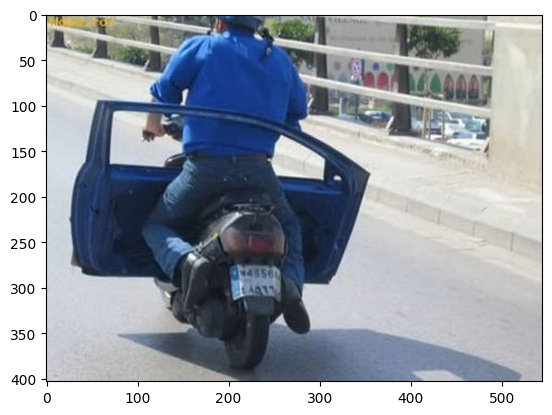

In [12]:
# @title Kiểm thử với ảnh bất kỳ
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/hiep.h5')

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict=model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])


